In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, welch
from scipy.fftpack import fft
from scipy import integrate
from obspy import read
from obspy.core.util import get_example_file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import segyio
import pywt
from scipy.stats import skew, kurtosis

In [3]:
segyfile= read("./Train_data/SGY/1.sgy")


In [7]:
def analyze_trace(trace):
    data = trace.data
    sampling_rate = trace.stats.sampling_rate
    time = np.arange(0, len(data)) / sampling_rate
    
    # Временные характеристики
    peaks, _ = find_peaks(data, height=0)
    peak_amplitudes = data[peaks]
    
    # Спектральный анализ (FFT)
    frequencies = np.fft.fftfreq(len(data), d=1/sampling_rate)
    fft_magnitude = np.abs(fft(data))
    
    # Энергия сигнала
    signal_energy = integrate.simps(data**2, time)
    
    return {
        'time': time,
        'data': data,
        'peaks': peaks,
        'peak_amplitudes': peak_amplitudes,
        'frequencies': frequencies,
        'fft_magnitude': fft_magnitude,
        'signal_energy': signal_energy
    }

In [8]:
all_traces_analysis = []
for trace in segyfile:
    trace_analysis = analyze_trace(trace)
    all_traces_analysis.append(trace_analysis)

C:\Users\vitya\AppData\Local\Temp\ipykernel_24400\625349263.py:15: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  signal_energy = integrate.simps(data**2, time)


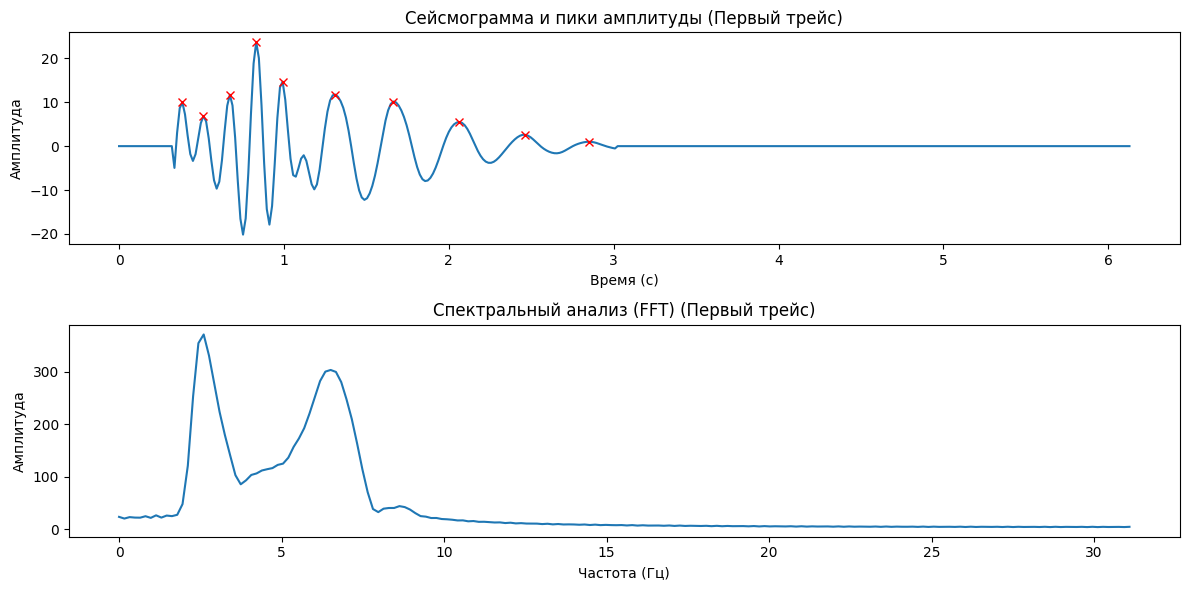

In [9]:
# Пример визуализации для первого трейса
first_trace_analysis = all_traces_analysis[0]

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(first_trace_analysis['time'], first_trace_analysis['data'])
plt.plot(first_trace_analysis['time'][first_trace_analysis['peaks']], first_trace_analysis['peak_amplitudes'], 'rx')
plt.title('Сейсмограмма и пики амплитуды (Первый трейс)')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')

plt.subplot(2, 1, 2)
plt.plot(first_trace_analysis['frequencies'][:len(first_trace_analysis['frequencies'])//2], first_trace_analysis['fft_magnitude'][:len(first_trace_analysis['fft_magnitude'])//2])
plt.title('Спектральный анализ (FFT) (Первый трейс)')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

In [10]:
for i, trace_analysis in enumerate(all_traces_analysis):
    print(f'Trace {i+1}: Энергия сигнала = {trace_analysis["signal_energy"]}')

Trace 1: Энергия сигнала = 132.38407258935476
Trace 2: Энергия сигнала = 101.01325158843399
Trace 3: Энергия сигнала = 74.07562859380184
Trace 4: Энергия сигнала = 55.20199331388368
Trace 5: Энергия сигнала = 43.868791836425515
Trace 6: Энергия сигнала = 37.68150618056456
Trace 7: Энергия сигнала = 33.49543325093388
Trace 8: Энергия сигнала = 29.008182564591838
Trace 9: Энергия сигнала = 23.941070643295834
Trace 10: Энергия сигнала = 19.649912263294073
Trace 11: Энергия сигнала = 16.75170998339416
Trace 12: Энергия сигнала = 14.641951060152307
Trace 13: Энергия сигнала = 12.693137857240156
Trace 14: Энергия сигнала = 11.078960278199299
Trace 15: Энергия сигнала = 9.92818928071934
Trace 16: Энергия сигнала = 8.965780040119775
Trace 17: Энергия сигнала = 7.839794880812521
Trace 18: Энергия сигнала = 6.716380864525052
Trace 19: Энергия сигнала = 6.014353130985414
Trace 20: Энергия сигнала = 5.51265759897079
Trace 21: Энергия сигнала = 4.900261534927026
Trace 22: Энергия сигнала = 4.236756

In [13]:
# Функция для анализа одного трейса

def analyze_trace(trace):
    data = trace.data
    sampling_rate = trace.stats.sampling_rate
    time = np.arange(0, len(data)) / sampling_rate

    # Временные характеристики
    peaks, _ = find_peaks(data, height=0)
    peak_amplitudes = data[peaks]

    # Спектральный анализ (FFT)
    frequencies = np.fft.fftfreq(len(data), d=1/sampling_rate)
    fft_magnitude = np.abs(fft(data))

    # Энергия сигнала
    signal_energy = integrate.simps(data**2, time)
    
    # Статистические характеристики
    mean_amplitude = np.mean(data)
    std_amplitude = np.std(data)
    median_amplitude = np.median(data)
    q25 = np.percentile(data, 25)
    q75 = np.percentile(data, 75)
    
    # Характеристики формы сигнала
    skewness = skew(data)
    kurt = kurtosis(data)
    rms = np.sqrt(np.mean(data**2))
    
    # Частотные характеристики
    mean_freq = np.mean(frequencies)
    dom_freq = frequencies[np.argmax(fft_magnitude)]
    
    # Энтропия
    shannon_entropy = -np.sum((data ** 2) * np.log(data ** 2 + 1e-10))
    spectral_entropy = -np.sum((fft_magnitude ** 2) * np.log(fft_magnitude ** 2 + 1e-10))
    
    # Характеристики пиков
    num_peaks = len(peaks)
    mean_peak_amplitude = np.mean(peak_amplitudes) if num_peaks > 0 else 0
    mean_peak_distance = np.mean(np.diff(peaks)) / sampling_rate if num_peaks > 1 else 0

    return {
        'mean_amplitude': mean_amplitude,
        'std_amplitude': std_amplitude,
        'median_amplitude': median_amplitude,
        'q25': q25,
        'q75': q75,
        'skewness': skewness,
        'kurtosis': kurt,
        'rms': rms,
        'mean_freq': mean_freq,
        'dom_freq': dom_freq,
        'signal_energy': signal_energy,
        'shannon_entropy': shannon_entropy,
        'spectral_entropy': spectral_entropy,
        'num_peaks': num_peaks,
        'mean_peak_amplitude': mean_peak_amplitude,
        'mean_peak_distance': mean_peak_distance
    }

# Анализ всех трейсов в стриме
all_traces_analysis = []
for trace in segyfile:
    trace_analysis = analyze_trace(trace)
    all_traces_analysis.append(trace_analysis)

# Преобразование результатов в DataFrame для удобства
df = pd.DataFrame(all_traces_analysis)

# Сохранение результатов в CSV для дальнейшего использования
df.to_csv('seismic_features.csv')




   mean_amplitude  std_amplitude  median_amplitude  q25       q75  skewness  \
0        0.061939       4.638252               0.0  0.0  0.000000  0.229404   
1        0.000084       4.056321               0.0  0.0  0.000000  0.340557   
2        0.009871       3.472145               0.0  0.0  0.000000  0.308130   
3        0.022513       2.997431               0.0  0.0  0.003031  0.199997   
4        0.018679       2.672045               0.0  0.0  0.086784  0.115858   

   kurtosis       rms  mean_freq  dom_freq  signal_energy  shannon_entropy  \
0  5.772816  4.638666   -0.08138  2.604167     132.384073    -39822.664062   
1  6.842604  4.056322   -0.08138  2.604167     101.013252    -29073.300781   
2  6.626005  3.472160   -0.08138  2.604167      74.075629    -19737.785156   
3  5.535855  2.997516   -0.08138  2.604167      55.201993    -13297.540039   
4  4.137081  2.672110   -0.08138  2.604167      43.868792     -9613.310547   

   spectral_entropy  num_peaks  mean_peak_amplitude  mea

C:\Users\vitya\AppData\Local\Temp\ipykernel_24400\3686329981.py:16: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  signal_energy = integrate.simps(data**2, time)


In [15]:
df

,mean_amplitude,std_amplitude,median_amplitude,q25,q75,skewness,kurtosis,rms,mean_freq,dom_freq,signal_energy,shannon_entropy,spectral_entropy,num_peaks,mean_peak_amplitude,mean_peak_distance
0,0.061939,4.638252,0.0,0.000000,0.000000,0.229404,5.772816,4.638666,-0.08138,2.604167,132.384073,-39822.664062,-3.467895e+07,10,9.791967,0.273778
1,0.000084,4.056321,0.0,0.000000,0.000000,0.340557,6.842604,4.056322,-0.08138,2.604167,101.013252,-29073.300781,-2.591604e+07,11,7.452608,0.249600
2,0.009871,3.472145,0.0,0.000000,0.000000,0.308130,6.626005,3.472160,-0.08138,2.604167,74.075629,-19737.785156,-1.850609e+07,11,6.463439,0.254400
3,0.022513,2.997431,0.0,0.000000,0.003031,0.199997,5.535855,2.997516,-0.08138,2.604167,55.201993,-13297.540039,-1.341317e+07,13,5.028883,0.242667
4,0.018679,2.672045,0.0,0.000000,0.086784,0.115858,4.137081,2.672110,-0.08138,2.604167,43.868792,-9613.310547,-1.038724e+07,14,4.247399,0.231385
5,0.017885,2.476369,0.0,-0.037350,0.286398,0.045525,3.035935,2.476434,-0.08138,2.604167,37.681506,-7680.259277,-8.770486e+06,14,4.235614,0.236308
6,0.021517,2.334536,0.0,-0.222613,0.379826,0.028798,2.435310,2.334635,-0.08138,2.604167,33.495433,-6447.921875,-7.716365e+06,14,4.134753,0.240000
7,0.023775,2.172957,0.0,-0.329638,0.441066,-0.049352,2.059120,2.173087,-0.08138,2.604167,29.008183,-5213.358398,-6.604755e+06,14,3.855516,0.243692
8,0.014083,1.973897,0.0,-0.223112,0.522273,-0.075629,1.782183,1.973947,-0.08138,2.604167,23.941071,-3940.357910,-5.356998e+06,14,3.412028,0.246154
9,0.000061,1.788016,0.0,-0.363386,0.499484,-0.057364,1.491277,1.788016,-0.08138,2.441406,19.649912,-2924.411133,-4.317694e+06,16,2.674020,0.216533


In [21]:
import obspy
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.fftpack import fft
from scipy import integrate

stream = segyfile.copy()

# Функция для анализа одного трейса
def analyze_trace(trace):
    data = trace.data
    sampling_rate = trace.stats.sampling_rate
    time = np.arange(0, len(data)) / sampling_rate

    # Временные характеристики
    peaks, _ = find_peaks(data, height=0)
    peak_amplitudes = data[peaks]

    # Энергия сигнала
    signal_energy = integrate.simps(data**2, time)
    
    # Статистические характеристики
    mean_amplitude = np.mean(data)
    
    # Спектральный анализ (FFT)
    frequencies = np.fft.fftfreq(len(data), d=1/sampling_rate)
    fft_magnitude = np.abs(fft(data))
    dom_freq = frequencies[np.argmax(fft_magnitude)]
    
    return {
        'mean_amplitude': mean_amplitude,
        'signal_energy': signal_energy,
        'num_peaks': len(peaks),
        'max_amplitude': np.max(data),
        'dom_freq': dom_freq,
        'peak_amplitudes': peak_amplitudes,
        'time': time,
        'data': data
    }

# Анализ всех трейсов в стриме
all_traces_analysis = []
for trace in stream:
    trace_analysis = analyze_trace(trace)
    all_traces_analysis.append(trace_analysis)

# Преобразование результатов в DataFrame для удобства
df = pd.DataFrame(all_traces_analysis)

# Глобальные характеристики
global_signal_energy = df['signal_energy'].sum()
global_mean_amplitude = df['mean_amplitude'].mean()
global_num_peaks = df['num_peaks'].sum()
global_max_amplitude = df['max_amplitude'].max()
global_mean_freq = df['dom_freq'].mean()

# Кросс-корреляция между первыми двумя трейсами (пример)
cross_corr = np.correlate(stream[0].data, stream[1].data, mode='full')

# Пространственная когерентность (пример среднего значения корреляции между всеми парами трейсов)
num_traces = len(stream)
cross_corr_values = []
for i in range(num_traces):
    for j in range(i+1, num_traces):
        corr = np.correlate(stream[i].data, stream[j].data, mode='full')
        cross_corr_values.append(np.max(corr))
mean_spatial_coherence = np.mean(cross_corr_values)

# Время прихода основных волн (пример для простого случая наибольшей амплитуды)
arrival_times_p = []
arrival_times_s = []
for trace_analysis in all_traces_analysis:
    max_index = np.argmax(trace_analysis['data'])
    arrival_times_p.append(trace_analysis['time'][max_index])
# Предположим, что S-волны приходят позже P-волн на некоторый фиксированный интервал (упрощенно)
arrival_times_s = [t + 1 for t in arrival_times_p]

mean_arrival_time_p = np.mean(arrival_times_p)
mean_arrival_time_s = np.mean(arrival_times_s)

# Вывод глобальных характеристик
print(f'Global signal energy: {global_signal_energy}')
print(f'Global mean amplitude: {global_mean_amplitude}')
print(f'Global number of peaks: {global_num_peaks}')
print(f'Global maximum amplitude: {global_max_amplitude}')
print(f'Global mean frequency: {global_mean_freq}')
print(f'Mean spatial coherence: {mean_spatial_coherence}')
print(f'Mean arrival time of P-waves: {mean_arrival_time_p}')
print(f'Mean arrival time of S-waves: {mean_arrival_time_s}')


Global signal energy: 684.4582987234758
Global mean amplitude: 0.010431923903524876
Global number of peaks: 600
Global maximum amplitude: 23.717132568359375
Global mean frequency: 2.352627840909091
Mean spatial coherence: 442.2894287109375
Mean arrival time of P-waves: 1.909333333333333
Mean arrival time of S-waves: 2.909333333333333


C:\Users\vitya\AppData\Local\Temp\ipykernel_24400\4969932.py:21: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  signal_energy = integrate.simps(data**2, time)
